# Requirements

In [49]:
import warnings
import pandas as pd 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [2]:
df = pd.read_csv('data/mental_health_diagnosis_treatment_data.csv')

In [3]:
df.shape

(500, 17)

In [4]:
df.sample(5)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
345,346,56.0,Male,Generalized Anxiety,6,7,8,7.0,Antidepressants,Interpersonal Therapy,2024-01-19,9,10.0,Deteriorated,7,Neutral,66
244,245,20.0,Female,Panic Disorder,8,6,4,4.0,Antipsychotics,Dialectical Behavioral Therapy,2024-02-19,11,10.0,Deteriorated,5,Depressed,89
147,148,45.0,Female,Generalized Anxiety,6,3,4,3.0,Mood Stabilizers,Interpersonal Therapy,2024-03-29,13,5.0,No Change,6,Anxious,65
104,105,NaN,Female,Generalized Anxiety,10,7,7,NaN,Antipsychotics,Dialectical Behavioral Therapy,2024-03-23,12,NaN,No Change,8,Stressed,66
167,168,23.0,Male,Major Depressive Disorder,10,3,7,7.0,SSRIs,Interpersonal Therapy,2024-02-13,16,10.0,No Change,10,Excited,90


In [6]:
df.drop(columns=['Patient ID', 'Treatment Start Date'], inplace=True)

In [7]:
df.isnull().sum()

Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

Preprocess the input and the output variables appropriately.

In [8]:
df['Outcome'].unique()

array(['Deteriorated', 'No Change', 'Improved'], dtype=object)

In [9]:
encoder = OrdinalEncoder(categories=[['Deteriorated', 'No Change', 'Improved']])
encoded_values = encoder.fit_transform(df[['Outcome']])
df[['Outcome']] = encoded_values

In [10]:
df['AI-Detected Emotional State'].unique()

array(['Anxious', 'Neutral', 'Happy', 'Excited', 'Stressed', 'Depressed'],
      dtype=object)

In [11]:
encoder = OrdinalEncoder(categories=[['Depressed', 'Anxious', 'Stressed', 'Neutral', 'Happy', 'Excited']])
encoded_values = encoder.fit_transform(df[['AI-Detected Emotional State']])
df[['AI-Detected Emotional State']] = encoded_values

In [12]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [13]:
df.sample(5)

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
115,33.0,1,Bipolar Disorder,8,5,4,4.0,Antipsychotics,Mindfulness-Based Therapy,12,8.0,2.0,8,5.0,60
36,45.0,0,Bipolar Disorder,5,5,6,6.0,Benzodiazepines,Mindfulness-Based Therapy,14,9.0,0.0,6,3.0,88
248,47.0,1,Panic Disorder,7,6,4,5.0,Antidepressants,Interpersonal Therapy,13,6.0,0.0,8,2.0,66
406,NaN,0,Bipolar Disorder,5,4,9,NaN,Anxiolytics,Interpersonal Therapy,14,NaN,0.0,5,0.0,87
262,37.0,0,Major Depressive Disorder,8,8,9,6.0,Anxiolytics,Cognitive Behavioral Therapy,12,NaN,0.0,10,5.0,62


In [14]:
df['Medication'].unique()

array(['Mood Stabilizers', 'Antipsychotics', 'SSRIs', 'Anxiolytics',
       'Antidepressants', 'Benzodiazepines'], dtype=object)

In [15]:
dummies = pd.get_dummies(df['Medication'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Medication', 'Mood Stabilizers'], inplace=True)
df.sample(3)

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%),Antidepressants,Antipsychotics,Anxiolytics,Benzodiazepines,SSRIs
320,44.0,1,Bipolar Disorder,10,5,8,7.0,Mindfulness-Based Therapy,16,9.0,0.0,7,3.0,87,False,False,True,False,False
15,38.0,0,Generalized Anxiety,10,3,8,2.0,Interpersonal Therapy,15,NaN,2.0,7,0.0,69,False,False,False,False,False
222,60.0,1,Panic Disorder,9,5,8,4.0,Interpersonal Therapy,13,5.0,1.0,6,3.0,65,False,True,False,False,False


In [16]:
df['Diagnosis'].unique()

array(['Major Depressive Disorder', 'Panic Disorder',
       'Generalized Anxiety', 'Bipolar Disorder'], dtype=object)

In [17]:
dummies = pd.get_dummies(df['Diagnosis'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Diagnosis', 'Major Depressive Disorder'], inplace=True)
df.sample(3)

,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,...,AI-Detected Emotional State,Adherence to Treatment (%),Antidepressants,Antipsychotics,Anxiolytics,Benzodiazepines,SSRIs,Bipolar Disorder,Generalized Anxiety,Panic Disorder
44,40.0,0,10,8,7,8.0,Cognitive Behavioral Therapy,12,5.0,0.0,...,5.0,72,False,True,False,False,False,False,False,True
352,57.0,0,10,8,4,9.0,Cognitive Behavioral Therapy,12,NaN,0.0,...,0.0,77,True,False,False,False,False,False,False,True
102,31.0,1,6,4,6,5.0,Mindfulness-Based Therapy,12,7.0,0.0,...,1.0,83,True,False,False,False,False,True,False,False


In [18]:
df['Therapy Type'].unique()

array(['Interpersonal Therapy', 'Mindfulness-Based Therapy',
       'Cognitive Behavioral Therapy', 'Dialectical Behavioral Therapy'],
      dtype=object)

In [19]:
dummies = pd.get_dummies(df['Therapy Type'])
df = pd.concat([df, dummies], axis=1)
df.drop(columns=['Therapy Type', 'Dialectical Behavioral Therapy'], inplace=True)
df.sample(3)

,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),...,Antipsychotics,Anxiolytics,Benzodiazepines,SSRIs,Bipolar Disorder,Generalized Anxiety,Panic Disorder,Cognitive Behavioral Therapy,Interpersonal Therapy,Mindfulness-Based Therapy
334,43.0,0,8,8,6,NaN,9,NaN,0.0,5,...,True,False,False,False,False,False,True,False,True,False
307,60.0,1,6,6,6,10.0,14,8.0,2.0,10,...,False,False,False,True,False,False,True,False,False,False
373,19.0,0,7,3,5,7.0,14,7.0,0.0,6,...,False,False,False,True,False,False,False,False,True,False


In [20]:
warnings.filterwarnings('ignore', category=FutureWarning, message='Downcasting behavior in `replace` is deprecated')

In [21]:
df = df.replace({True: 1, False: 0})

In [22]:
df.sample(3)

,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),...,Antipsychotics,Anxiolytics,Benzodiazepines,SSRIs,Bipolar Disorder,Generalized Anxiety,Panic Disorder,Cognitive Behavioral Therapy,Interpersonal Therapy,Mindfulness-Based Therapy
237,18.0,1,9,4,4,7.0,12,6.0,2.0,7,...,0,0,0,1,1,0,0,0,1,0
25,19.0,0,9,7,9,6.0,15,8.0,0.0,6,...,1,0,0,0,1,0,0,0,0,0
156,44.0,1,6,8,7,6.0,14,8.0,2.0,10,...,1,0,0,0,0,0,1,0,0,0


Explore the dataset using visualizations of your choice.

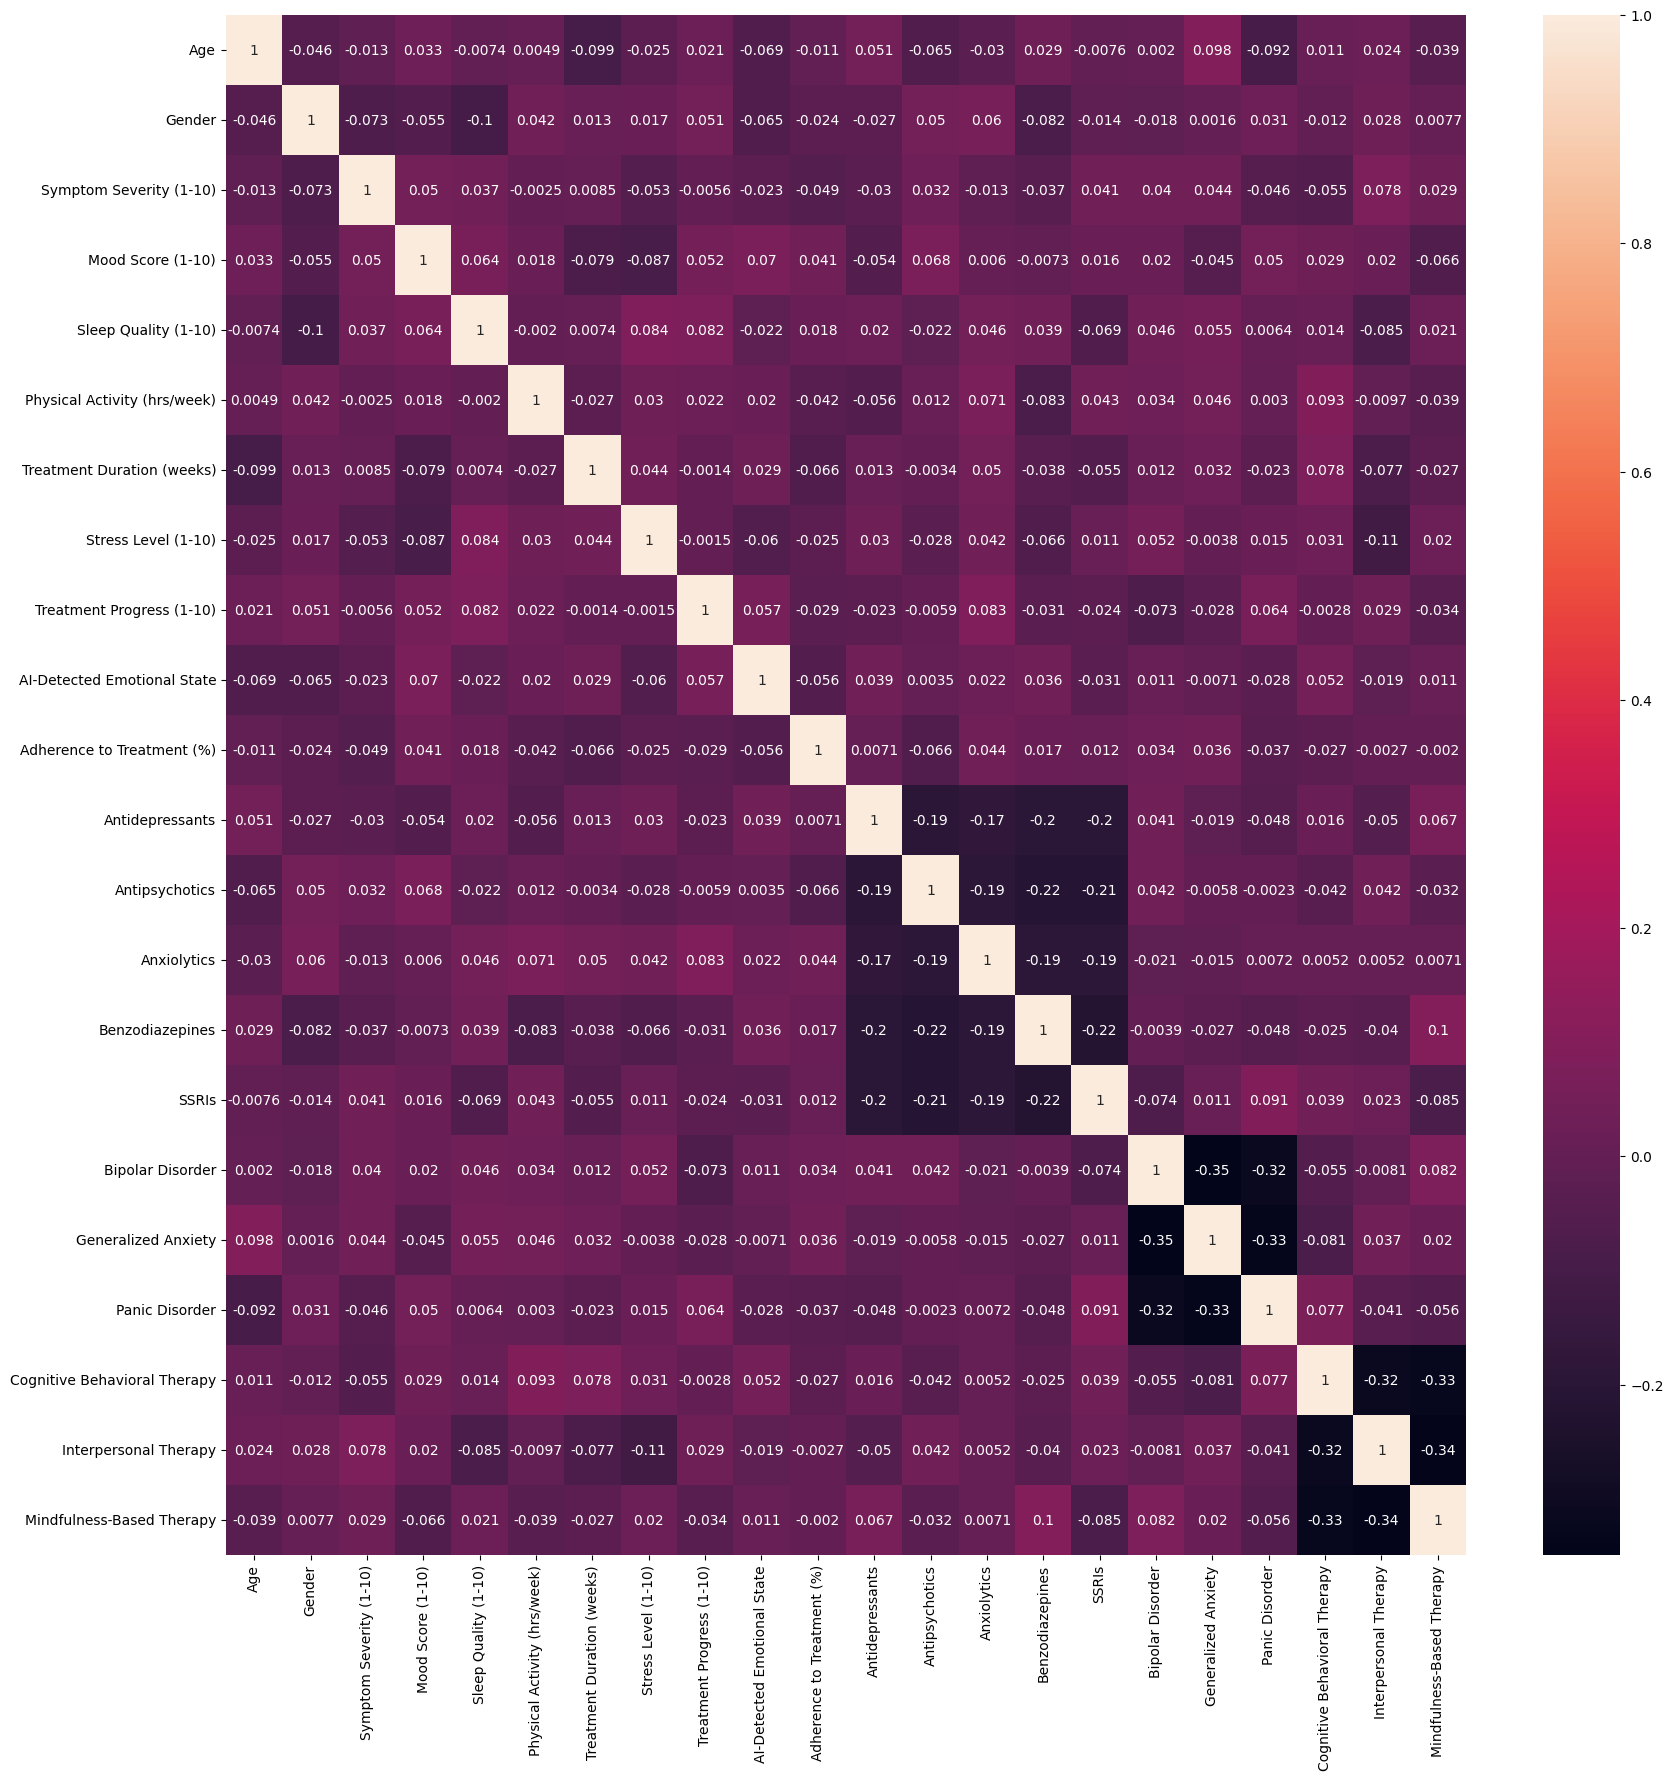

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns='Outcome').corr(), annot=True)
plt.show()

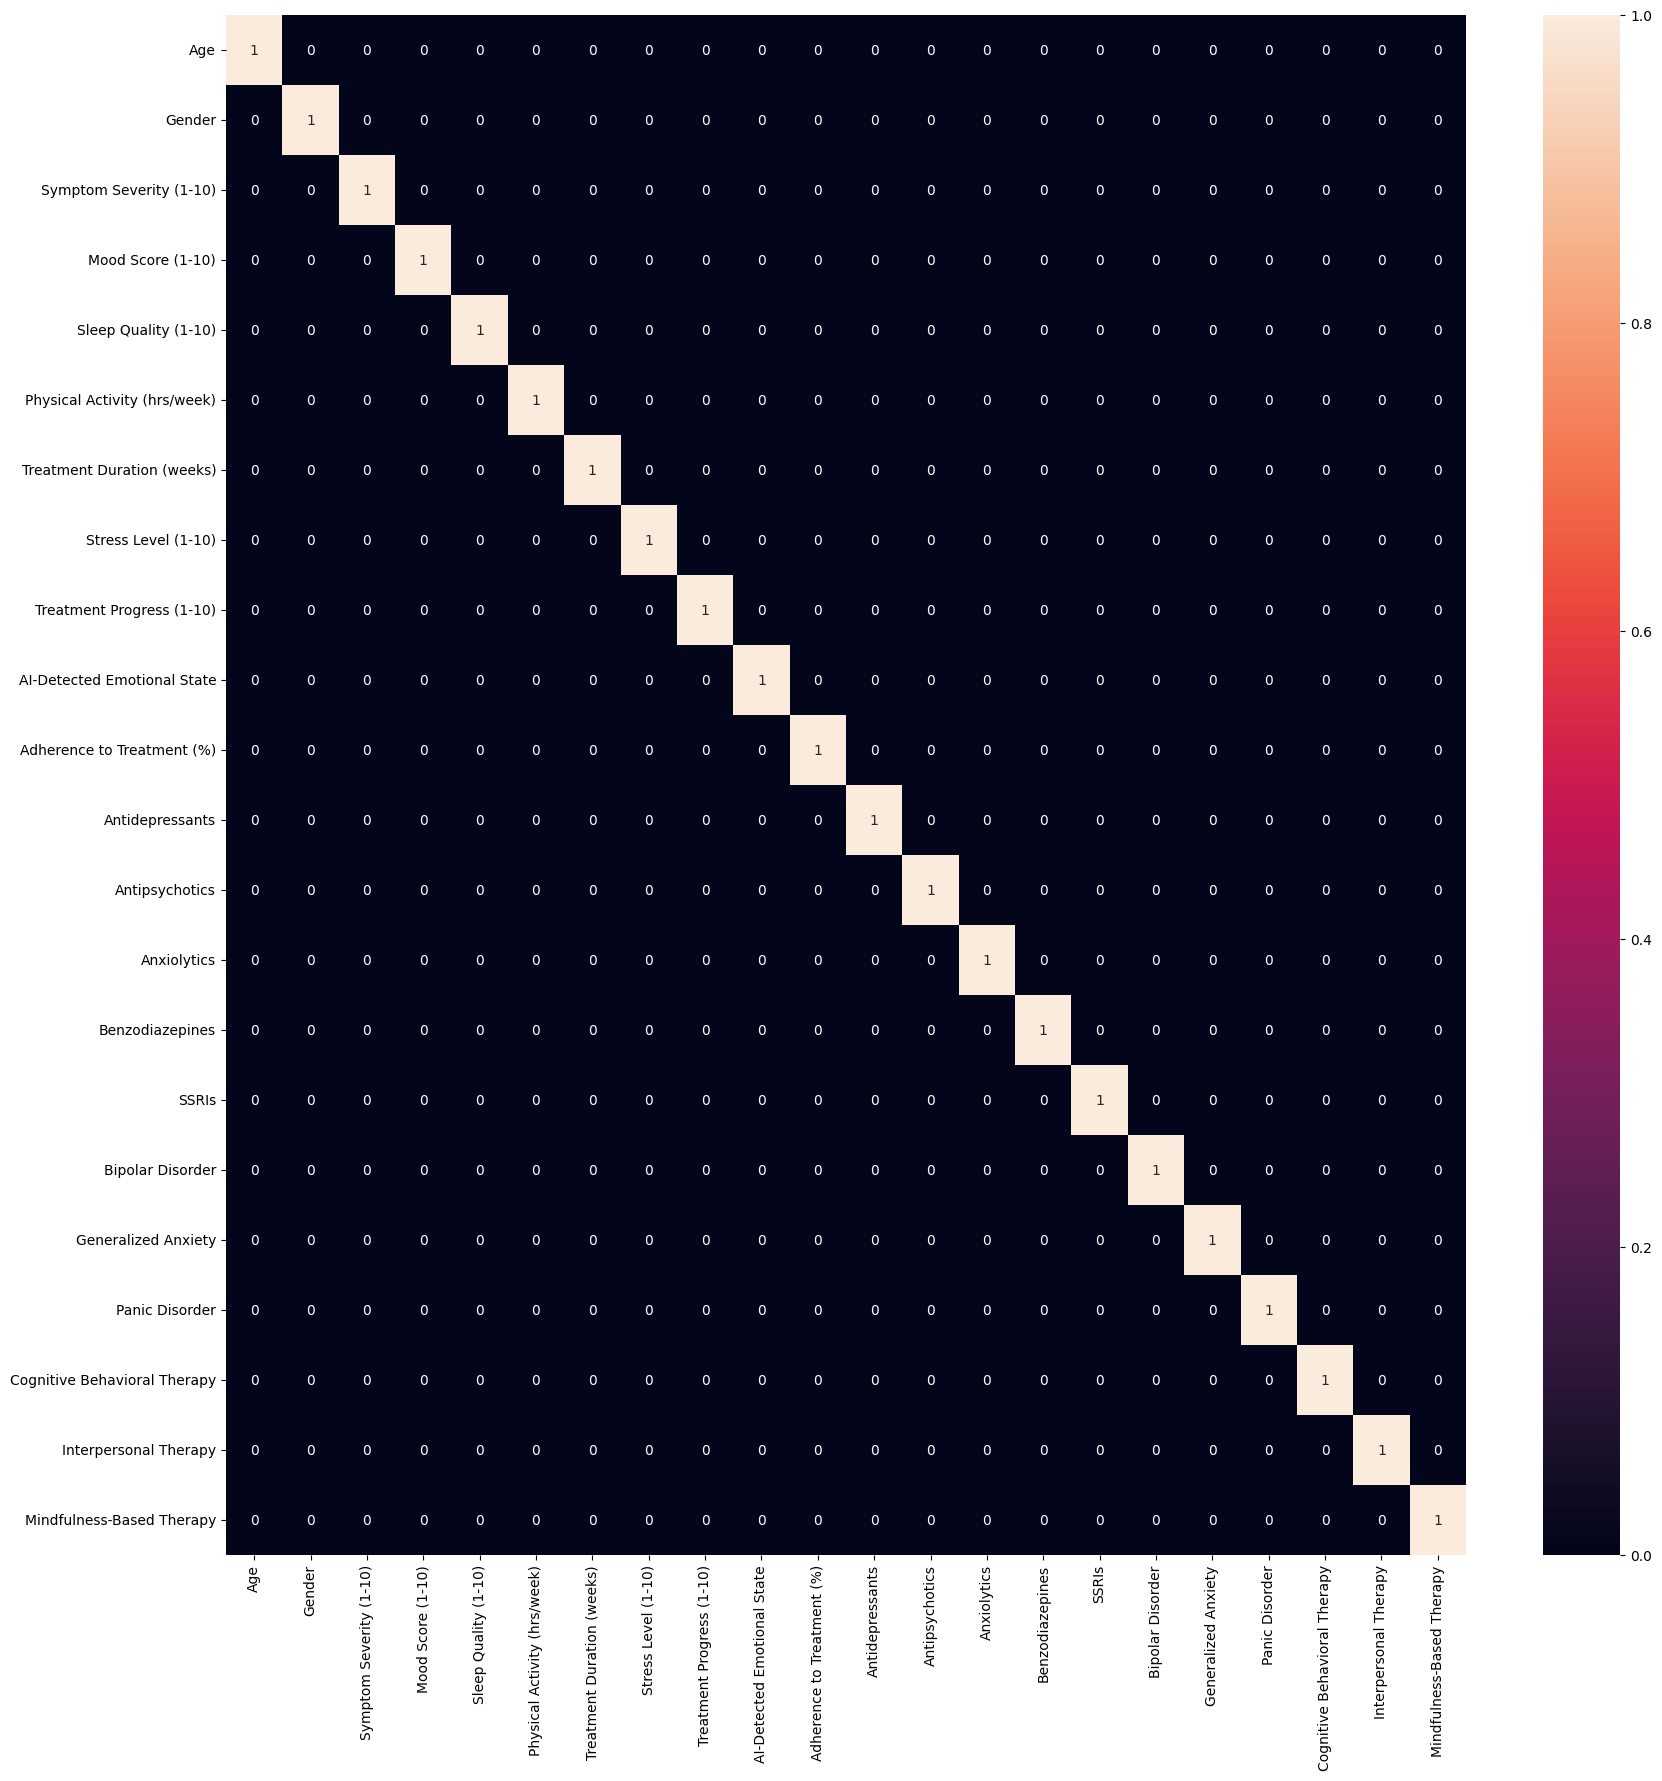

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df.drop(columns='Outcome').corr())>0.5, annot=True)
plt.show()

Check if the dataset is balanced.

In [28]:
df['Outcome'].value_counts()

Outcome
0.0    171
2.0    170
1.0    159
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [32]:
df.isnull().sum() # Num. of missing values

Age                              25
Gender                            0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
Antidepressants                   0
Antipsychotics                    0
Anxiolytics                       0
Benzodiazepines                   0
SSRIs                             0
Bipolar Disorder                  0
Generalized Anxiety               0
Panic Disorder                    0
Cognitive Behavioral Therapy      0
Interpersonal Therapy             0
Mindfulness-Based Therapy         0
dtype: int64

In [33]:
df.isnull().sum() / len(df) * 100 # Percentage

Age                              5.0
Gender                           0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
Antidepressants                  0.0
Antipsychotics                   0.0
Anxiolytics                      0.0
Benzodiazepines                  0.0
SSRIs                            0.0
Bipolar Disorder                 0.0
Generalized Anxiety              0.0
Panic Disorder                   0.0
Cognitive Behavioral Therapy     0.0
Interpersonal Therapy            0.0
Mindfulness-Based Therapy        0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

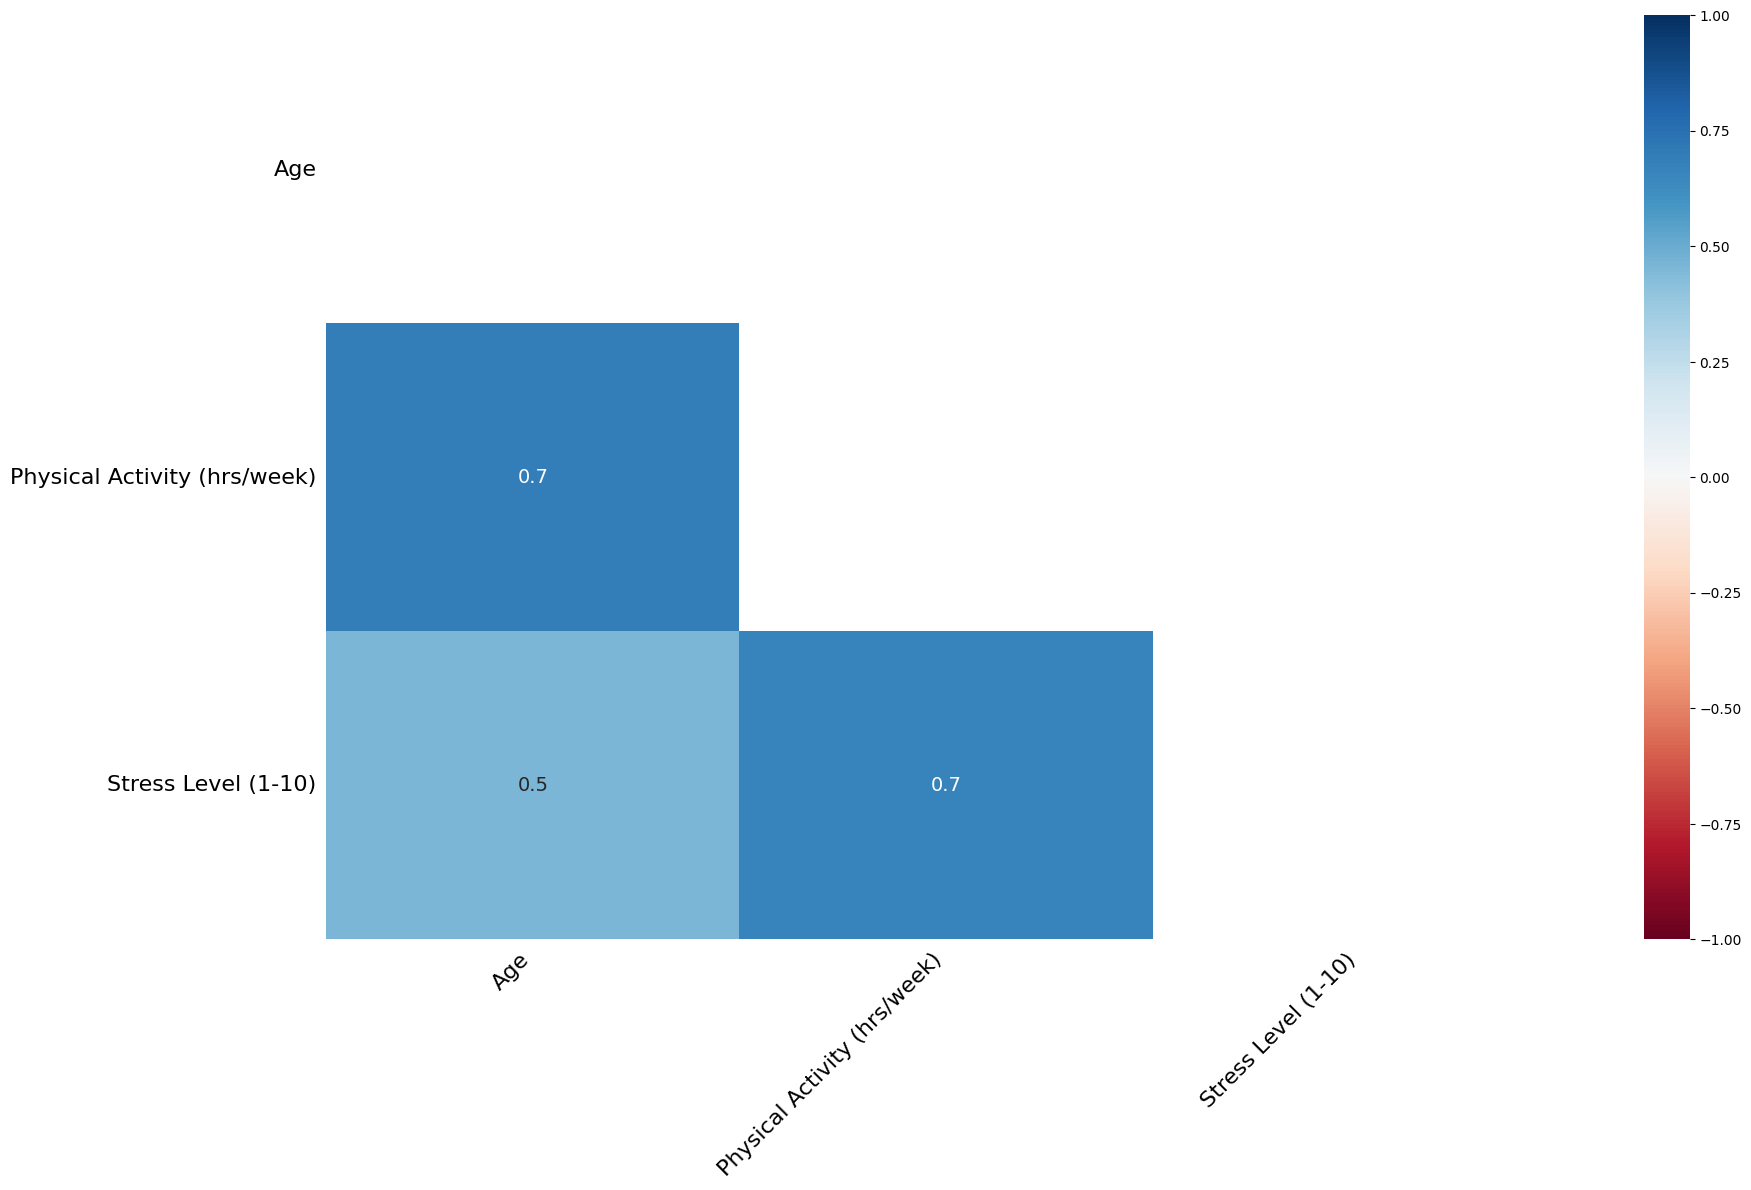

In [34]:
msno.heatmap(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [39]:
imputer = IterativeImputer()

In [41]:
imputed_data = imputer.fit_transform(df[['Age', 'Physical Activity (hrs/week)','Stress Level (1-10)']])
df[['Age', 'Physical Activity (hrs/week)','Stress Level (1-10)']] = imputed_data

In [42]:
df.isnull().sum()

Age                             0
Gender                          0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
Antidepressants                 0
Antipsychotics                  0
Anxiolytics                     0
Benzodiazepines                 0
SSRIs                           0
Bipolar Disorder                0
Generalized Anxiety             0
Panic Disorder                  0
Cognitive Behavioral Therapy    0
Interpersonal Therapy           0
Mindfulness-Based Therapy       0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [44]:
X, y = df.drop(columns='Outcome'), df['Outcome']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling
Standardize the features appropriately.

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [70]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Use the trained model to make predictions for the test set.

In [71]:
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.34      0.62      0.44        24
         1.0       0.48      0.39      0.43        36
         2.0       0.52      0.35      0.42        40

    accuracy                           0.43       100
   macro avg       0.45      0.45      0.43       100
weighted avg       0.46      0.43      0.43       100

